# Proyecto 6: Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

En el [Readme](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) del dataset se puede encontrar información adicional. A continuación vamos a describir cada uno de ellos.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

Como se mencionó en clase, las implementaciones en esta librería tiene algunas mejoras respecto de las estrategias convencionales como SVD. Esto se traduce en una mayor cantidad de parámetros para optimizar.

Vamos a levantar los datos. En primer lugar, definamos el formato para poder leer los datos.

**1) Utilizar** el `Reader` con el parámetro `line_format` igual a `'user item rating timestamp'` y `sep` como `'\t'`. Guardarlo en una variable `reader`.

In [1]:
from surprise import Dataset
from surprise import Reader

In [2]:
reader = Reader(line_format = 'user item rating timestamp', sep = '\t')

In [3]:
reader

Utilizando este `reader` cargar los datos:

In [4]:
data = Dataset.load_from_file('./dataset/ml-100k/u.data', reader=reader)

In [5]:
data

__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [6]:
from surprise import SVD #single value descomposition - 
from surprise.model_selection import cross_validate

In [7]:
algo = SVD()

In [8]:
cv = cross_validate(algo, data, measures=['rmse'], cv=5)

In [9]:
cv

{'test_rmse': array([0.93137803, 0.93880935, 0.93495925, 0.93942525, 0.93452857]),
 'fit_time': (3.4699087142944336,
  3.4803218841552734,
  3.5606822967529297,
  3.5091331005096436,
  3.518094062805176),
 'test_time': (0.12118124961853027,
  0.11572074890136719,
  0.13062310218811035,
  0.12066793441772461,
  0.10073089599609375)}

In [10]:
cv['test_rmse'].mean()

0.9358200881712773

__3) Evaluar el RMSE (promedio de cross validation) de testing de acuerdo a la cantidad de factores en SVD.__

In [11]:
import numpy as np
rmse_test_means = []

factors = np.arange(1,200,20)
for factor in factors:
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'],  cv=3, verbose=False)
    rmse_test_means.append(np.mean(cv['test_rmse']))

__4) Graficar los promedios RMSE del conjunto de testing de acuerdo a la cantidad de factores en SVD.__

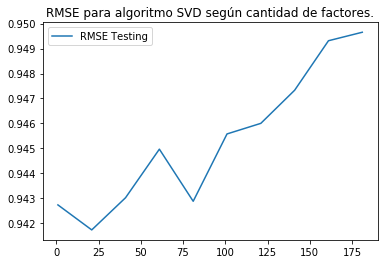

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(factors, rmse_test_means, label='RMSE Testing')
plt.legend(loc="best")
plt.title("RMSE para algoritmo SVD según cantidad de factores.")
plt.show()

__5) Usando GridSearch, encontrar el mejor estimador usando SVD con 500 factores. Imprimir el mejor rmse. Utilizar `refit` para obtener obtener el mejor estimador ya ajustado como resultado.__ 

Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


In [13]:
from surprise.model_selection import GridSearchCV

In [14]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

In [15]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, refit=True)

In [16]:
gs.fit(data)

In [17]:
print(gs.best_params['rmse'])

{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [18]:
print(gs.best_score['rmse'])

0.9613049814966865


__6) Obtener una predicción para el usuario 321 para la película Titanic.__

In [19]:
import pandas as pd

In [20]:
# Movies Dataset
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure','Animation', 'Children\'s', 
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./Dataset/ml-100k/u.item', sep='|', names=m_cols, encoding='latin-1')


In [21]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
movies.loc[movies['title'].str.startswith('Titanic')]['movie_id'] #startswith el string arranque con la palabra entre parentesis

312    313
Name: movie_id, dtype: int64

In [39]:
gs.predict(321,313)

Prediction(uid=321, iid=313, r_ui=None, est=3.52986, details={'was_impossible': False})

__7) Desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas).__

In [29]:
user_unique = set([i[0] for i in data.raw_ratings]) # i[0] de data.raw_ratings saca los usuarios, ponerlo dentro de un set asegura que sean valores unicos
iid_unique = set([i[1] for i in data.raw_ratings]) # i[1] de data.raw_ratings saca las películas, ponerlo dentro de un set asegura que sean valores unicos

def prediccion(uid):
    iid_user = set([i[1] for i in data.raw_ratings if i[0] == uid]) # saca las películas que ya vistas
    iid_predict = iid_unique - iid_user # guardo las películas que no ha visto el usuario
    predict_result = [] 
    for iid in iid_predict :
        predict_result.append(gs.predict(uid,iid)) # guarda las predicciones
    return sort(predict_result)

def sort(predict_result):
    sort_results = pd.DataFrame(predict_result)
    sort_results = sort_results.sort_values(by='est',ascending=False).reset_index(drop=True)
    best_iid = sort_results.iloc[0,][1]
    best_name = movies[movies['movie_id']==int(best_iid)]['title'].values
    print('La película recomendada es: ',best_name, ' cuyo id es: ', best_iid)
    #print('Top 5 de pelícmulas recomendadas:\n', sort_results.iloc[:5,]) # no lo piden, pero si desea ver el top5 de recomendaciones para el usuario puede descomentar esta linea

uid = input ("Ingrese el Id del usuario:")

if uid in user_unique:
    prediccion(uid)
else:
    print('Usuario no encontrado, asegurese de ingresar un id valido.')


Ingrese el Id del usuario: 201


La película recomendada es:  ['Wrong Trousers, The (1993)']  cuyo id es:  169


In [33]:
##TE QUIERO PYTHON